# SSP of aste1080 grid

find the boundaires of this regional domain, and visualize the state

**NOTE:** Using branch *aste1080* of **xmitgcm** package

In [1]:
import numpy as np
import xmitgcm
import ecco_v4_py as ecco

import os
import warnings
warnings.simplefilter('ignore')
os.environ['PYTHONWARNOINGS'] = 'ignore'

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean.cm as cmo

import sandbox as sb

In [2]:
scr2Dir = '/scratch2/ivana'

asteGRID=f'{scr2Dir}/grids/aste1080/GRID/'
asteData=f'{scr2Dir}/data/aste1080/'
asteTS=f'{asteData}diags/STATE/'

### Load tile<>.mitgrid info

In [3]:
meta = xmitgcm.utils.get_extra_metadata(domain='aste1080', nx=1080)
meta

{'has_faces': True,
 'ny': 4140,
 'nx': 1080,
 'ny_facets': [1260, 0, 1080, 540, 1260],
 'pad_before_y': [900, 0, 0, 0, 0],
 'pad_after_y': [0, 0, 0, 540, 900],
 'face_facets': [0, 0, 2, 3, 4, 4],
 'facet_orders': ['C', 'C', 'C', 'F', 'F'],
 'face_offsets': [0, 1, 0, 0, 0, 1],
 'transpose_face': [False, False, False, True, True, True]}

In [4]:
ds = xmitgcm.open_mdsdataset(asteTS, asteGRID, 
                                   geometry='llc',
                                   nx=1080,
                                   extra_metadata=meta,
                                   delta_t=1200,
                                   ref_date='2000-01-01')

In [23]:
ds.Z

<xarray.DataArray 'Z' (k: 90)>
dask.array<xarray-Z, shape=(90,), dtype=>f4, chunksize=(90,), chunktype=numpy.ndarray>
Coordinates:
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    Z        (k) >f4 dask.array<chunksize=(90,), meta=np.ndarray>
    drF      (k) >f4 dask.array<chunksize=(90,), meta=np.ndarray>
    PHrefC   (k) >f4 dask.array<chunksize=(90,), meta=np.ndarray>
    rhoRef   (k) >f4 dask.array<chunksize=(90,), meta=np.ndarray>
Attributes:
    standard_name:  depth
    long_name:      vertical coordinate of cell center
    units:          m
    positive:       down

In [ ]:
ds.Depth.plot(col='face', col_wrap=3)

## Plot THETA and SALT of face 4

In [30]:
k=40
plt.rcParams.update({'font.size':16})
depth = np.round(-1*ds.Z.isel(k=k).values)
THETA = ds.THETA.mean('time').isel(face=4)
SALT  = ds.SALT.mean('time').isel(face=4)

SALT = SALT.where(ds.hFacC.isel(face=4,k=k) !=0, np.nan)
THETA = THETA.where(ds.hFacC.isel(face=4,k=k) !=0, np.nan)

In [31]:
s = SALT.isel(k=k)
t = THETA.isel(k=k)

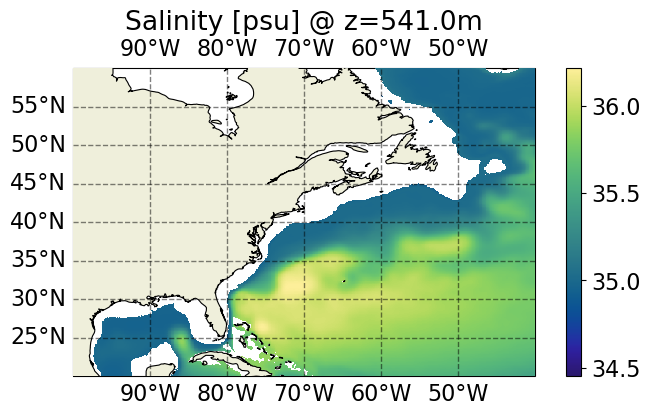

In [32]:
plt.figure(figsize=(8,4))
P = ecco.plot_proj_to_latlon_grid(s.XC, s.YC, s, \
                                  cmap=cmo.haline,#cmin=30,cmax=35,\
                                  projection_type='PlateCarree',\
                                  lat_lim=45,dx=.1,dy=.1, \
                                  show_colorbar=True,\
                                  show_grid_labels=True)

P[1].set_extent([-100, -40, 20, 60], crs=ccrs.PlateCarree())
P[-1].right_labels = False

plt.title( ds.SALT.attrs['long_name'] + ' [' + ds.SALT.attrs['units'] +'] @ z=' + str(depth) + ds.Z.attrs['units'])
plt.savefig('salinity_k'+ str(k) +'.png', bbox_inches='tight', dpi=300)

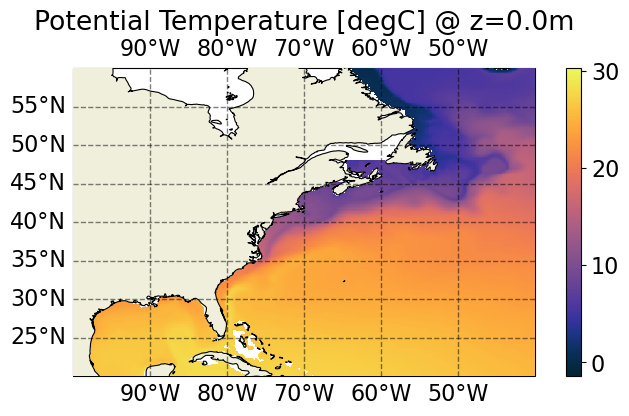

In [19]:
plt.figure(figsize=(8,4))
P = ecco.plot_proj_to_latlon_grid(t.XC, t.YC, t, \
                                  cmap=cmo.thermal,#cmin=30,cmax=40,\
                                  projection_type='PlateCarree',\
                                  lat_lim=45,dx=.1,dy=.1, \
                                  show_colorbar=True,\
                                  show_grid_labels=True)

P[1].set_extent([-100, -40, 20, 60], crs=ccrs.PlateCarree())
P[-1].right_labels = False

plt.title( ds.THETA.attrs['long_name'] + ' [' + ds.THETA.attrs['units'] +'] @ z=' + str(depth) + ds.Z.attrs['units'])
plt.savefig('temperature_k'+ str(k) +'.png', bbox_inches='tight', dpi=300)

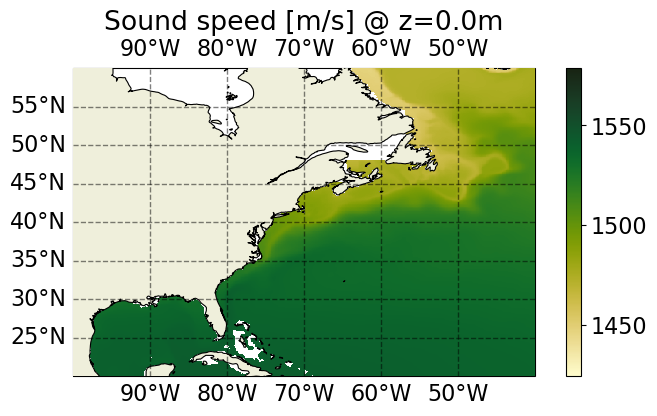

In [20]:
plt.figure(figsize=(8,4))
P = ecco.plot_proj_to_latlon_grid(t.XC, t.YC, sb.ssp(s,t,1), \
                                  cmap=cmo.speed,#cmin=30,cmax=40,\
                                  projection_type='PlateCarree',\
                                  lat_lim=45,dx=.1,dy=.1, \
                                  show_colorbar=True,\
                                  show_grid_labels=True)

P[1].set_extent([-100, -40, 20, 60], crs=ccrs.PlateCarree())
P[-1].right_labels = False

plt.title('Sound speed' + ' [m/s] @ z=' + str(depth) + ds.Z.attrs['units'])
plt.savefig('ssp_k'+ str(k) +'.png', bbox_inches='tight', dpi=300)

<sub> Written by Escobar, I. Jan 2023